In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans


import matplotlib.pyplot as plt
import seaborn as sns


Bad key "text.kerning_factor" on line 4 in
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
def calculate_profit(ticker , from_date , to_date):
    filename = ('stocks/{0}.csv').format(ticker)
    data = pd.read_csv(filename)
    data = data.loc[ (data['Date'] >= from_date) & (data['Date'] <= to_date)]
    change_Percent  =  (data.iloc[-1]['Adj Close'] -  data.iloc[0]['Adj Close']) * 100 /  data.iloc[0]['Adj Close']
    print(ticker, np.round(change_Percent,3))
    

In [3]:
df = pd.read_csv('stocks/total_data_changePercent_Symbol.csv', index_col='Symbol')
df.head()

,2019-01-14,2019-01-15,2019-01-16,2019-01-17,2019-01-18,2019-01-22,2019-01-23,2019-01-24,2019-01-25,2019-01-28,...,2019-12-17,2019-12-18,2019-12-19,2019-12-20,2019-12-23,2019-12-24,2019-12-26,2019-12-27,2019-12-30,2019-12-31
Symbol,,,,,,,,,,,,,,,,,,,,,
A,68.659694,69.207608,69.361896,69.543875,69.850471,70.161023,70.368719,70.794000,71.353786,71.618842,...,83.677893,83.679884,83.620163,83.914789,84.076038,84.344786,84.746910,84.928065,84.906026,84.951842
AAL,31.764372,31.701391,31.587237,31.890335,32.317430,32.520153,32.431585,32.592976,32.868521,33.380246,...,27.550188,27.777349,27.942738,28.253589,28.528573,28.707910,29.040680,29.018761,28.871306,28.747763
AAP,160.831351,160.883127,160.486853,160.727798,162.358691,163.435999,164.242480,163.021799,160.421127,157.882187,...,155.244272,155.668912,155.752530,156.344638,157.646619,158.175125,158.434393,158.807343,159.006781,159.044675
AAPL,149.021536,149.476358,149.795911,150.199753,151.087827,151.734766,151.901398,151.462256,151.834738,151.732797,...,274.135553,275.920471,277.623804,278.477460,279.301276,280.069360,282.093066,284.039166,286.442938,288.363165
ABBV,79.963240,79.194032,78.974455,78.987061,79.401961,80.117938,80.659509,80.720093,79.497426,77.228326,...,86.091547,86.602910,86.610686,86.892615,87.052051,87.007330,87.104547,87.188153,87.038440,86.705959


In [4]:
symbols = df.index.to_numpy()
data = df.to_numpy()


In [5]:
# define normalizer
normalizer = Normalizer()

# create a K-means model with 20 clusters
kmeans = KMeans(n_clusters=10, max_iter=1000 , n_init = 30)

# make a pipeline chaining normalizer and kmeans
pipeline = make_pipeline(normalizer,kmeans)

In [6]:
pipeline.fit(data)

Pipeline(memory=None,
         steps=[('normalizer', Normalizer(copy=True, norm='l2')),
                ('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=1000, n_clusters=10, n_init=30, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [7]:
# predict cluster labels
labels = pipeline.predict(data)

# create a DataFrame aligning labels & companies
df_result = pd.DataFrame({'Cluster': labels, 'Symbol': symbols})

# display df sorted by cluster labels
df_result.sort_values('Cluster')

,Cluster,Symbol
163,0,EVRG
69,0,BR
413,0,STE
67,0,BLL
384,0,RE
...,...,...
309,9,MOS
312,9,MRO
321,9,MYL
43,9,APA


In [16]:
cls = 7
symbols =  df_result[df_result['Cluster'] == cls]['Symbol'].tolist()
print(cls, symbols)

7 ['A', 'AAP', 'ADM', 'ADSK', 'AES', 'AMCR', 'ANTM', 'AOS', 'BA', 'BK', 'BWA', 'BXP', 'CAT', 'CRM', 'CSX', 'DISCA', 'DISCK', 'DPZ', 'EA', 'EMN', 'EXPD', 'FRC', 'GE', 'GILD', 'GM', 'GPC', 'HCA', 'HOG', 'HPE', 'HPQ', 'HRL', 'HST', 'IFF', 'ILMN', 'INCY', 'IP', 'IPG', 'IRM', 'ISRG', 'IT', 'JNJ', 'LLY', 'LNC', 'LUV', 'LVS', 'MHK', 'MO', 'MTB', 'NCLH', 'NRG', 'NUE', 'PBCT', 'PKI', 'PM', 'PRU', 'RCL', 'RHI', 'RJF', 'SCHW', 'SIVB', 'SLG', 'SNA', 'UNP', 'VAR', 'VNO', 'WAB', 'WAT', 'WYNN', 'ZION']


In [17]:
for s in symbols: 
    calculate_profit(s , '2019-01-01' , '2019-12-31')

A 30.976
AAP 1.573
ADM 17.16
ADSK 42.261
AES 44.954
AMCR 23.082
ANTM 19.806
AOS 11.636
BA 2.92
BK 8.565
BWA 25.722
BXP 30.015
CAT 20.166
CRM 19.985
CSX 18.4
DISCA 26.752
DISCK 27.948
DPZ 21.936
EA 33.769
EMN 12.037
EXPD 17.517
FRC 35.225
GE 44.758
GILD 6.367
GM 13.374
GPC 15.528
HCA 22.901
HOG 13.749
HPE 21.438
HPQ 3.02
HRL 11.372
HST 17.378
IFF -1.922
ILMN 12.638
INCY 37.382
IP 17.548
IPG 19.209
IRM 6.892
ISRG 26.848
IT 22.447
JNJ 17.403
LLY 16.989
LNC 17.45
LUV 16.073
LVS 34.103
MHK 14.992
MO 8.045
MTB 20.173
NCLH 37.824
NRG 4.625
NUE 10.984
PBCT 19.965
PKI 26.634
PM 33.918
PRU 18.477
RCL 39.942
RHI 14.072
RJF 22.845
SCHW 16.237
SIVB 28.186
SLG 22.983
SNA 17.777
UNP 34.137
VAR 26.041
VNO 18.106
WAB 10.503
WAT 27.392
WYNN 37.37
ZION 28.351


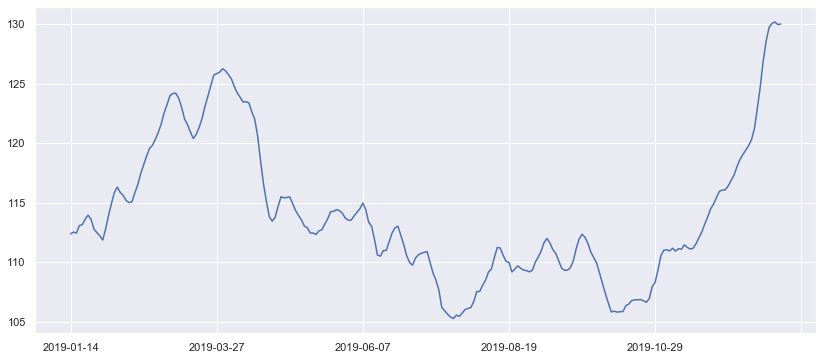

In [18]:
sns.set(rc={'figure.figsize':(14, 6)})
df.loc['LLY'].plot()

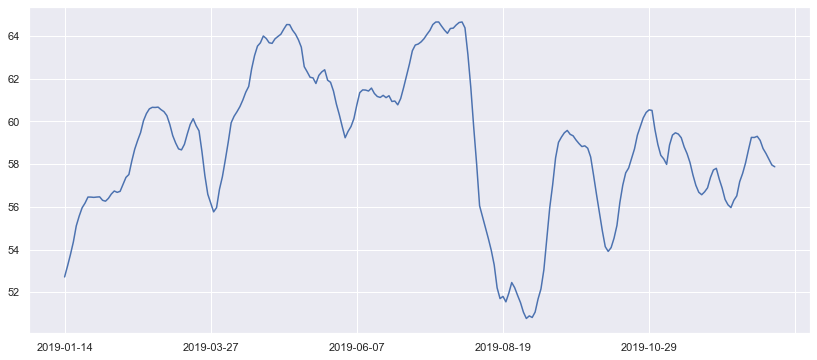

In [19]:
df.loc['LNC'].plot()